# **Preserving Phylogenetic Signal in High-Dimensional Metagenomic Data: A Comparative Analysis of GPU-Accelerated Dimensionality Reduction Techniques for 16S rRNA Taxonomic Classification!**

# **`1. Tools Bantuan`**

In [ ]:
!rm -rf /kaggle/working/FASTA-KmerReduce/FASTA-KmerReduce

In [ ]:
!rm -rf /kaggle/working/FASTA-KmerReduce/rki_2025/prep/vectorization/species/k8/label_encoder_k8_species_NEW.pkl

In [ ]:
cd /

In [ ]:
cd /kaggle/working

In [ ]:
!mv /kaggle/working/rki_2025/prep/vectorization_config/all_vectorization_output_paths.txt  /kaggle/working/rki_2025/prep/vectorization_config/all_vectorization_output_paths_1.txt

In [ ]:
with open("catatan.txt", "r") as file:
    isi = file.readlines()  # Membaca per baris
    
# Ganti baris pertama
isi[0] = "Halo Kaggle\n"

# Nambah baris baru
isi.append("Ini baris tambahan\n")

# Tulis Ulang
with open("catatan.txt", "w") as file:
    file.writelines(isi)

# Lihat Hasilnya
with open("catatan.txt", "r") as file:
    print(file.read())


# **`2. Installasi & Import`**

In [1]:
import sys
import time
import contextlib
with open('install.log', 'a') as inpt:
    with contextlib.redirect_stdout(inpt):

        # -- Start installation --
        start = time.time()
        ! pip install gdown biopython memory_profiler
        import pandas as pd
        end = time.time()
        # -- End installation --
print(f'+ Time elapsed: ' + time.strftime('%Mm %Ss', time.gmtime(end - start)))

+ Time elapsed: 00m 01s


In [2]:
# Clone repo tapi hanya ambil struktur (tanpa file dulu)
!git clone --depth 1 --filter=blob:none --sparse https://github.com/setiawantirta/FASTA-KmerReduce.git

# Masuk ke repo
%cd FASTA-KmerReduce

# Aktifkan sparse checkout hanya untuk folder 'benchmark'
!git sparse-checkout set benchmark

# Lihat hasilnya
!ls benchmark

Cloning into 'FASTA-KmerReduce'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), done.
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 1 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 1.10 MiB | 20.05 MiB/s, done.
/kaggle/working/FASTA-KmerReduce
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 23 (delta 8), reused 20 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (23/23), 167.43 KiB | 7.61 MiB/s, done.
Resolving deltas: 100% (8/8), done.
create_folder.py	 feature_reduction_v4.py  __pycache__
extract_split.py	 __init__.py		  training.py
feature_reduction.py	 loader.p

In [1]:
def reload_and_import_benchmark(import_mode="all"):
    """
    Fungsi untuk reload dan import dari package benchmark
    
    Parameters:
    import_mode (str): "all" untuk import *, "specific" untuk import fungsi tertentu
    """
    import importlib
    import sys
    import os
    import sys
    #sys.path.append("/kaggle/working/FASTA-KmerReduce")

    print(f"🔄 Starting reload and import process (mode: {import_mode})...")
    
    # 🔧 FIX 1: Set environment variable untuk disable GPU sebelum import
    os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Disable all GPUs
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'   # Suppress TensorFlow warnings
    
    # 🔧 FIX 2: Daftar modul dengan urutan yang benar (parent dulu)
    benchmark_modules = [
        'benchmark',                    # Parent package HARUS pertama
        'benchmark.create_folder',      
        'benchmark.loader', 
        'benchmark.extract_split', 
        'benchmark.feature_reduction', 
        'benchmark.training'
    ]
    
    # Reload semua modul dengan error handling yang lebih baik
    for module_name in benchmark_modules:
        if module_name in sys.modules:
            try:
                importlib.reload(sys.modules[module_name])
                print(f"   ♻️ Reloaded: {module_name}")
            except Exception as e:
                print(f"   ⚠️ Failed to reload {module_name}: {e}")
        else:
            # 🔧 FIX 3: Import module jika belum ada di sys.modules
            try:
                __import__(module_name)
                print(f"   ✨ Imported (new): {module_name}")
            except Exception as e:
                print(f"   ⚠️ Failed to import {module_name}: {e}")
    
    # Import berdasarkan mode dengan error handling
    try:
        # 🔧 FIX 4: Pastikan parent package di-import terlebih dahulu
        import benchmark
        
        if import_mode == "all":
            # Import ALL functions explicitly
            import benchmark.create_folder as cf_module
            import benchmark.loader as loader_module
            import benchmark.extract_split as es_module
            import benchmark.feature_reduction as fr_module
            import benchmark.training as training_module
            
            # Get all public functions from each module
            for module_name, module in [
                ('create_folder', cf_module),
                ('loader', loader_module), 
                ('extract_split', es_module),
                ('feature_reduction', fr_module),
                ('training', training_module)
            ]:
                for attr_name in dir(module):
                    if not attr_name.startswith('_') and callable(getattr(module, attr_name)):
                        globals()[attr_name] = getattr(module, attr_name)
            
            print("✅ ALL functions imported explicitly")
            
        elif import_mode == "specific":
            # Import specific functions
            from benchmark.create_folder import create_project_folders
            from benchmark.loader import load_, run_extract_, load_all_csv_data
            from benchmark.extract_split import main_vectorization_process
            from benchmark.feature_reduction import benchmark_
            from benchmark.training import validate_naive_bayes_simple
            
            # Update globals
            globals().update({
                'create_project_folders': create_project_folders,
                'load_': load_,
                'run_extract_': run_extract_,
                'load_all_csv_data': load_all_csv_data,
                'main_vectorization_process': main_vectorization_process,
                'benchmark_': benchmark_,
                'validate_naive_bayes_simple': validate_naive_bayes_simple,
            })
            print("✅ Specific functions imported")
        
        # Print summary
        print(f"\n📋 Import completed with mode: {import_mode}")
        print(f"🖥️  GPU disabled - running in CPU-only mode")
        
    except Exception as e:
        print(f"❌ Import failed: {e}")
        import traceback
        traceback.print_exc()

# Penggunaan:
import os
os.environ['ENABLE_GPU_BENCHMARK'] = '1'  # Enable GPU
reload_and_import_benchmark("all")

🔄 Starting reload and import process (mode: all)...
   ✨ Imported (new): benchmark
   ♻️ Reloaded: benchmark.create_folder
   ♻️ Reloaded: benchmark.loader
   ♻️ Reloaded: benchmark.extract_split
   ♻️ Reloaded: benchmark.feature_reduction
   ♻️ Reloaded: benchmark.training
✅ ALL functions imported explicitly

📋 Import completed with mode: all
🖥️  GPU disabled - running in CPU-only mode


In [2]:
# Test import
print("Testing function availability...")
try:
    print(f"✅ run_extract_ is available: {callable(run_extract_)}")
    print(f"✅ load_ is available: {callable(load_)}")
    print(f"✅ create_project_folders is available: {callable(create_project_folders)}")
except NameError as e:
    print(f"❌ Function not found: {e}")

Testing function availability...
✅ run_extract_ is available: True
✅ load_ is available: True
✅ create_project_folders is available: True


# **`3. Buat Folder`**

In [4]:
import os
folders = create_project_folders(project_name='rki_2025',
                       path=os.getcwd(),
                       DIR_path=None
                       )

🔹 Folder project_name sudah dibuat: /Users/tirtasetiawan/Documents/rki_v1/rki_2025
🔹 Folder dataset sudah dibuat: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/dataset
🔹 Folder prep sudah dibuat: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/prep
🔹 Folder model sudah dibuat: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/model
🔹 Folder pred sudah dibuat: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/pred


# **`4. Load Dataset`**

In [5]:
from Bio import SeqIO

# Path file FASTA
fasta_path = "/Users/tirtasetiawan/Documents/rki_v1 copy/src/data/0_dna-sequences-silva-v3-v4.fasta"

# Membaca isi file FASTA
with open(fasta_path, "r") as handle:
    records = list(SeqIO.parse(handle, "fasta"))

# Tampilkan jumlah sekuens dan contoh awal
print(f"Total sekuens ditemukan: {len(records)}\n")
print("=== Contoh 5 sekuens pertama ===\n")

for i, record in enumerate(records[:5]):
    print(f">{record.id}")
    print(str(record.seq)[:100] + "...")  # tampilkan 100 huruf pertama saja
    print()


Total sekuens ditemukan: 398508

=== Contoh 5 sekuens pertama ===

>CP013078.2406498.2408039
TGGGGAATTTTGGACAATGGGGGCAACCCTGATCCAGCCATCCCGCGTGTGCGATGAAGGCCTTCGGGTTGTAAAGCACTTTTGGCAGGAAAGAAACGGC...

>CP015924.1224168.1225721
TGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAGCCATGCCGCGTGTATGAAGAAGGCCTTCGGGTTGTAAAGTACTTTCAGCGGGGAGGAAGGTGT...

>CP003278.287486.289015
TGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAGCCATGCCGCGTGTATGAAGAAGGCCTTCGGGTTGTAAAGTACTTTCAGCGGGGAGGAAGGTGT...

>LS483321.16842.18378
TAGGGAATCTTCGGCAATGGGGGCAACCCTGACCGAGCAACGCCGCGTGAGTGAAGAAGGTTTTCGGATCGTAAAGCTCTGTTGTTAGAGAAGAATGATG...

>CP012870.431955.433510
TGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAGCCATGCCGCGTGTATGAAGAAGGCCTTCGGGTTGTAAAGTACTTTCAGCGGGGAGGAAGGGAG...



In [7]:
df_tax = load_(
    fasta='/Users/tirtasetiawan/Documents/rki_v1 copy/src/data/0_dna-sequences-silva-v3-v4.fasta',
    tax='/Users/tirtasetiawan/Documents/rki_v1 copy/src/data/0_taxonomy.tsv',
    only_bacteria=True
)

Loading FASTA sequences...
Loaded 398508 sequences from FASTA
Loading taxonomy data...
Loaded taxonomy data: 436680 rows
After mapping sequences: 398508 rows
Extracting taxonomic levels...
Sample taxonomy string: d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Alcaligenaceae; g__Bordetella; s__Bordetella_pertussis
Unique kingdoms found: ['d__Bacteria' 'd__Eukaryota' 'd__Archaea']
Filtered to bacteria only: 368859 sequences (removed 29649)
Final dataset: 368859 sequences with taxonomy



🔬 PROCESSING LEVEL: SPECIES

📊 STEP 1: LOAD DATA - SPECIES

📋 INITIAL DATA SUMMARY:
   • Total samples: 368,859
   • Total classes: 23389

📈 CLASS SIZE DISTRIBUTION (BEFORE FILTERING):
   • Classes with 1 sample: 13209
   • Classes with 2-3 samples: 5156
   • Classes with 4-9 samples: 2984
   • Classes with ≥10 samples: 2040

⚠️  FILTERING: Dropping classes with < 10 samples
   • Classes to drop: 21349
   • Samples to drop: 42,066

   📋 Examples of dropped classes:
       1.  s__Bacillus_horneckiae: 9 samples
       2.  s__uncultured_Bordetella: 9 samples
       3.  s__Helicobacter_heilmannii: 9 samples
       4.  s__Ktedonobacter_racemifer: 9 samples
       5.  s__Roseateles_depolymerans: 9 samples
       6.  s__uncultured_Rhodocyclales: 9 samples
       7.  s__Shinella_sp.: 9 samples
       8.  s__Sporomusa_sphaeroides: 9 samples
       9.  s__Psychrobacter_maritimus: 9 samples
      10.  s__Flexibacter_flexilis: 9 samples
      ... and 21339 more classes

✅ AFTER FILTERING:
   • Re

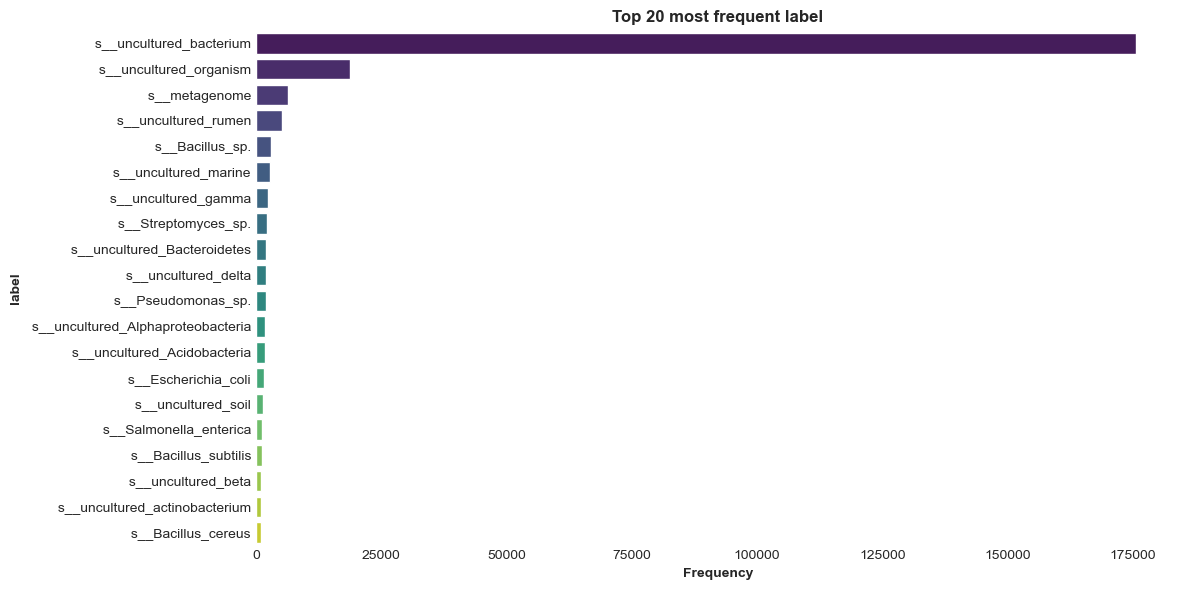

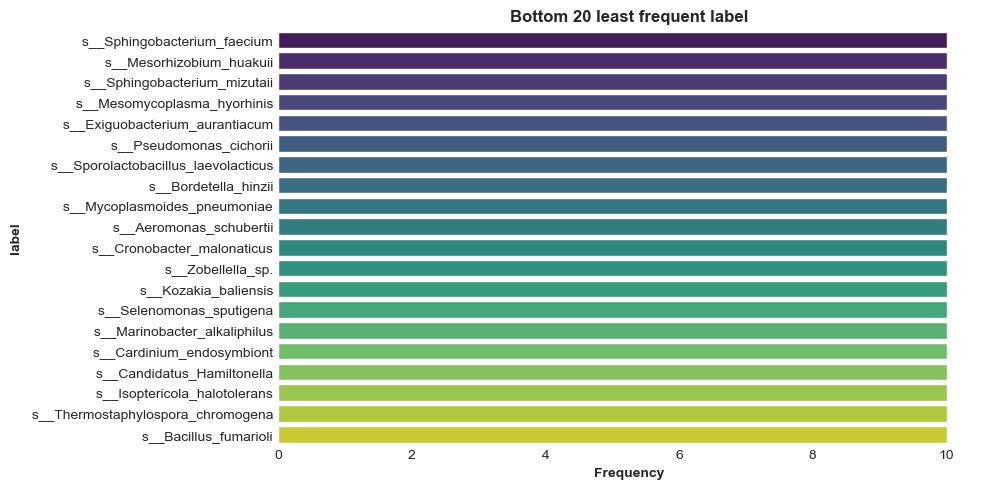

📊 Frequency plots saved to: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/dataset/species


🧹 FILTERING UNWANTED LABELS
   Keywords to filter: ['uncultured', 'uncultivated', 'metagenome', 'metagenomic', 'unidentified', 'unknown', 'unclassified', 'environmental', 'clone']
   Case sensitive: False

📊 BEFORE FILTERING:
   • Total samples: 326,793
   • Total classes: 2,040

✅ AFTER FILTERING:
   • Remaining samples: 77,759
   • Remaining classes: 1,602

📉 FILTERED OUT:
   • Samples removed: 249,034 (76.21%)
   • Classes removed: 438 (21.47%)

   📋 Breakdown by keyword:
      • 'uncultured': 241,012 samples
      • 'metagenome': 7,019 samples
      • 'unidentified': 1,003 samples

🌳 APPLYING HIERARCHICAL GROUPING

🌳 HIERARCHICAL RARE CLASS GROUPING
   Threshold: 10 samples
   Strategy: group
   ✅ No rare classes found (all classes ≥ 10 samples)

📊 APPLYING CENTROID-BASED UNDERSAMPLING
   Strategy: centroid_closest

📊 CENTROID CLOSEST SAMPLING
   Sample fraction: 0.001
   Min samples per cl

KeyboardInterrupt: 

In [8]:
# ✅ BEST PRACTICE: Preserve ALL rare taxa
csv_paths, paths_file = run_extract_(
    df_tax,
    columns_select=['species'],
    output_path='/Users/tirtasetiawan/Documents/rki_v1/rki_2025/dataset',
    
    kmer_size=6,

    # ✅ NEW: Filtering configuration (DEFAULT)
    filter_uncultured=True,      # Remove 'uncultured' labels
    filter_metagenome=True,       # Remove 'metagenome' labels
    filter_unidentified=True,     # Remove 'unknown', 'unidentified'
    filter_environmental=True,   # Keep 'environmental' labels

    # 🆕 Keep all classes initially
    min_sample_freq=10,           # ✅ NO initial filtering
    
    # Balancing strategy
    imbalance_strategy='hierarchical_grouping',
    hierarchical_grouping=True,   # Group rare by genus

    # Balancing Using Under Sampling
    sampling_strategy='centroid_closest', # None untuk ambil semua data
    sample_fraction=0.001, # jumlah baris yang diambil/disampel
    small_class_threshold=10,     # Group if <10 samples, ✅ Group rare classes
    small_class_strategy='group',
    min_samples_per_class=10, # ✅ Ensure minimum per class
    
    # 🆕 Keep only top 100 classes (AFTER balancing)
    top_n_classes=None,  # ← NEW! Integer 100, 50, 200, etc.

    # Visualization
    create_plots=True,
    plot_top_n=None
)

# **`5. Ekstract Level Taksonomi`**


🔬 Processing level: SPECIES
= STEP 1: Load Data species =
SUMMARY species
== Hitung frekuensi kelas & drop label < 4
CSV saved to: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/dataset/species/species.csv


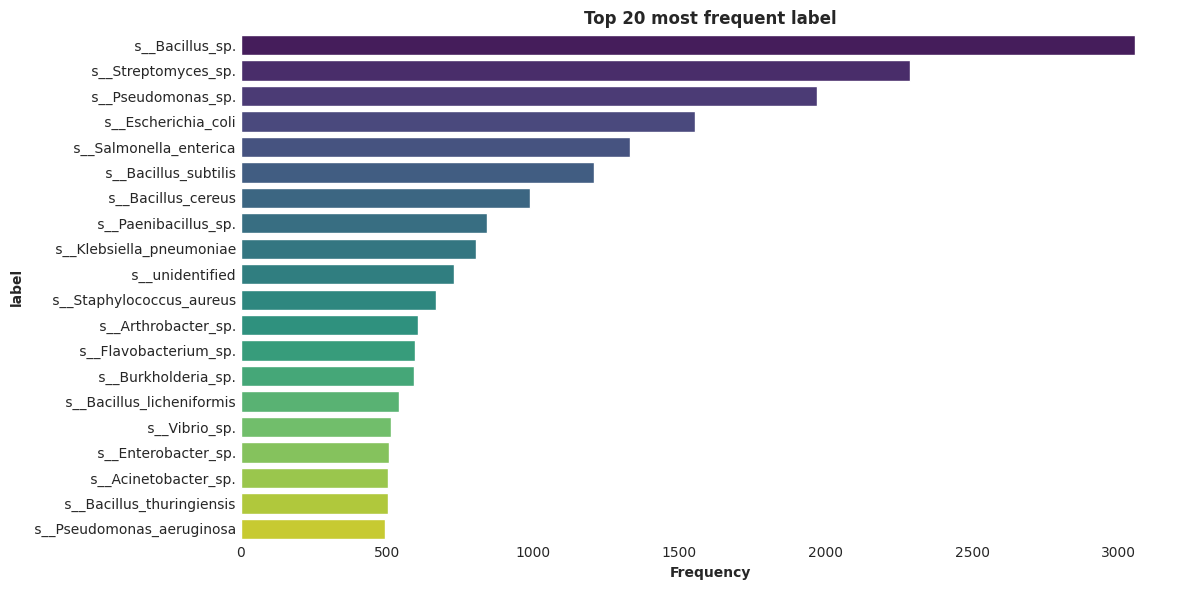

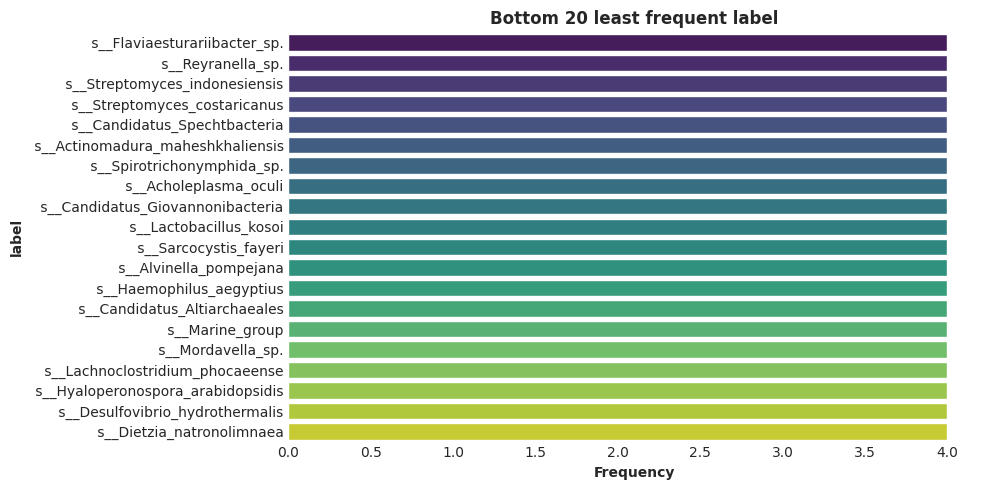

=== Jumlah label sebelum filter: 27139
=== Jumlah label setelah filter: 4658
=== Jumlah baris data: 97739

📊 Applying sampling strategy: centroid_kmeans

🧬 CENTROID-BASED SAMPLING (ENHANCED)
   Method: kmeans
   K-mer size: 6
   Sample fraction: 50
   Min samples per class: 10
   Small class threshold: 10
   Small class strategy: group

📊 CLASS DISTRIBUTION:
   Total classes: 4658
   Large classes (>10 samples): 1517
   Small classes (≤10 samples): 3141
   Total samples in small classes: 18319

🔷 Grouping 3141 small classes into 'RARE_CLASS'
   ✅ Keeping all 18319 rare samples

🔬 Processing 1517 large classes...
   📊 K-mer feature space: 4096 dimensions

   [1/1517] Class:  s__Bacillus_sp.
      Original: 3058 → Target: 3058 samples
      ✅ Sampled from 5 clusters

   [2/1517] Class:  s__Streptomyces_sp.
      Original: 2287 → Target: 2287 samples
      ✅ Sampled from 5 clusters

   [3/1517] Class:  s__Pseudomonas_sp.
      Original: 1971 → Target: 1971 samples
      ✅ Sampled from 5 c

In [13]:
# Example 1: Group small classes (RECOMMENDED)
csv_paths, paths_file = run_extract_(
    df_tax,
    columns_select=['species'],
    output_path=folders['dataset'],
    generate_dummy=True,
    sampling_strategy='centroid_kmeans',
    sample_fraction=50,
    min_samples_per_class=10,
    small_class_threshold=10,
    small_class_strategy='group',  # 🎯 Group rare classes
    kmer_size=6
)

# # Option A: Closest to centroid (most representative)
# sampling_strategy='centroid_closest'

# # Option B: Diverse (60% closest + 40% farthest)
# sampling_strategy='centroid_diverse'

# # Option C: K-means clustering
# sampling_strategy='centroid_kmeans'

# sampling_strategy='stratified',
# sample_fraction=0.1  # 10% random dari tiap class

# sampling_strategy='balanced',
# sample_per_label=50  # Exactly 50 samples per class

In [ ]:
import os
import pandas as pd

# ============================================================
# STEP 1: Define paths
# ============================================================
csv_level_file_path = "/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/dataset/csv_level_paths_list.txt"

# ============================================================
# STEP 2: Check if file exists
# ============================================================
print("🔍 Checking paths file...")
if not os.path.exists(csv_level_file_path):
    print(f"❌ File NOT found: {csv_level_file_path}")
    print(f"🔄 Generating new paths file...")
    
    # Regenerate paths file
    dataset_folder = os.path.dirname(csv_level_file_path)
    csv_files = []
    
    for root, dirs, files in os.walk(dataset_folder):
        for file in files:
            if file.endswith('.csv') and 'paths_list' not in file:
                full_path = os.path.join(root, file)
                csv_files.append(full_path)
    
    with open(csv_level_file_path, 'w') as f:
        for path in csv_files:
            f.write(path + '\n')
    
    print(f"✅ Generated paths file with {len(csv_files)} entries")

# ============================================================
# STEP 3: Load data
# ============================================================
def load_all_csv_data_safe(paths_file):
    """Safe version of load_all_csv_data with error handling"""
    
    data_dict = {}
    
    # Read paths
    with open(paths_file, 'r') as f:
        paths = [line.strip() for line in f.readlines() if line.strip()]
    
    print(f"\n📂 Loading data from {len(paths)} files...")
    
    for path in paths:
        # Extract level name
        level = os.path.basename(os.path.dirname(path))
        
        # Handle edge case: if file is directly in dataset folder
        if level == 'dataset':
            filename = os.path.basename(path)
            level = filename.replace('_sampled.csv', '').replace('.csv', '')
        
        print(f"   Loading {level}...")
        
        try:
            if os.path.exists(path):
                df = pd.read_csv(path)
                data_dict[level] = df
                print(f"      ✅ Loaded {len(df):,} rows, {df.shape[1]} columns")
            else:
                print(f"      ❌ File not found: {path}")
        except Exception as e:
            print(f"      ❌ Error loading {path}: {e}")
    
    print(f"\n✅ Successfully loaded {len(data_dict)} datasets")
    return data_dict

# Load data
all_level_data = load_all_csv_data_safe(csv_level_file_path)

# ============================================================
# STEP 4: Verify loaded data
# ============================================================
print("\n📊 LOADED DATASETS SUMMARY:")
print("="*60)
for level, df in all_level_data.items():
    print(f"📁 {level:15s} | Rows: {len(df):,} | Cols: {df.shape[1]}")
    if 'label' in df.columns:
        n_classes = df['label'].nunique()
        print(f"   └─ Classes: {n_classes}")

# Display first dataset
if len(all_level_data) > 0:
    first_level = list(all_level_data.keys())[0]
    print(f"\n📋 Sample from '{first_level}':")
    print(all_level_data[first_level].head())

🔍 Checking paths file...

📂 Loading data from 1 files...
   Loading species...
      ✅ Loaded 68,232 rows, 2 columns

✅ Successfully loaded 1 datasets

📊 LOADED DATASETS SUMMARY:
📁 species         | Rows: 68,232 | Cols: 2
   └─ Classes: 1518

📋 Sample from 'species':
                                            sequence       label
0  TGGGGAATATTGGACAATGGGCGCAAGCCTGATCCAGCCATGCCGC...  RARE_CLASS
1  TGGGGAATCTTGGACAATGGGCGCAAGCCTGATCCAGCCATGCCGC...  RARE_CLASS
2  TCGAGAATCTTTCGCAATGGACGGAAGTCTGACGAAGCGACGCCGC...  RARE_CLASS
3  TGGGGAATATTGGACAATGGGCGCAAGCCTGATCCAGCCATGCCGC...  RARE_CLASS
4  TGGGGAATATTGGACAATGGGCGCAAGCCTGATCCAGCCATGCCGC...  RARE_CLASS


# **`6. Split & Ekstraksi Fitur`**

In [ ]:
taxonomy_paths_txt = "/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/dataset/csv_level_paths_list.txt"  # Your txt file with paths
output_base_path = "/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep"  # Base path for output

# Run the complete process with monitoring
print("🔧 Initializing vectorization pipeline...")

vectorization_paths, summary, all_paths = main_vectorization_process(
    taxonomy_paths_txt=taxonomy_paths_txt,
    output_base_path=output_base_path,
    k_values=[4,6,8],
    test_size=0.2,      # 15% for testing
    random_state=42     # For reproducibility
)


🔧 Initializing vectorization pipeline...
🚀 STARTING VECTORIZATION PIPELINE WITH TRAIN-TEST SPLIT
📁 Input taxonomy paths file: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/dataset/csv_level_paths_list.txt
📁 Output base path: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep
🔢 K-mer values: [8]
🔀 Test size: 0.2
🎲 Random state: 42
🔍 Loading taxonomy file paths...


Reading paths: 100%|██████████| 1/1 [00:00<00:00,  9.57file/s]


✅ Found species: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/dataset/species/species.csv

✅ Loaded 1 taxonomy files

📊 Loading taxonomy data...


Loading data:   0%|          | 0/1 [00:00<?, ?level/s]

Loading species data from: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/dataset/species/species.csv


Loading data: 100%|██████████| 1/1 [00:00<00:00,  2.07level/s]

✅ Loaded species: 68232 samples (0 removed), 1518 unique labels


Loading data: 100%|██████████| 1/1 [00:00<00:00,  2.06level/s]



🚀 STARTING VECTORIZATION PROCESS WITH TRAIN-TEST SPLIT
📊 Total operations: 1
📁 Levels: ['species']
🔢 K-mers: [8]
🔀 Test size: 0.2
🎲 Random state: 42


Overall Progress:   0%|          | 0/1 [00:00<?, ?operation/s]


🧬 PROCESSING LEVEL: SPECIES (1/1)
✅ Processing species: 68232 samples, 1518 unique labels


Processing species k-mer 8:   0%|          | 0/1 [00:00<?, ?operation/s]


🔄 CountVectorizer k-mer 8 for species
Creating vectorizer...
Fitting and transforming sequences...




Vectorizing species k-mer 8: 100%|██████████| 68232/68232 [00:11<00:00, 5812.65seq/s]


Encoding labels...



Label encoding: 100%|██████████| 1/1 [00:00<00:00, 87.89step/s]


Shape X: (68232, 79725)
Shape y: (68232,)
Jumlah kelas unik (label): 1518
Jumlah total data: 68232
🔀 Train-test split (test_size=0.2)...
Train label count: 1518
Test label count: 1518
Train shape: X(54585, 79725), y(54585,)
Test shape: X(13647, 79725), y(13647,)




                                                                        
                                                                             

Processing species k-mer 8:   0%|          | 0/1 [00:11<?, ?operation/s]                  


✅ Saved: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/species/k8/label_encoder_k8_species.pkl




                                                                        
                                                                             

Processing species k-mer 8:   0%|          | 0/1 [00:12<?, ?operation/s]                       


✅ Saved: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/species/k8/vectorizer_k8_species.pkl




                                                                        
                                                                             

Processing species k-mer 8:   0%|          | 0/1 [00:17<?, ?operation/s]                     


                                                                        
                                                                             

Processing species k-mer 8:   0%|          | 0/1 [00:17<?, ?operation/s]                      


✅ Saved: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/species/k8/X_sparse_k8_species.npz
✅ Saved: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/species/k8/y_encoded_k8_species.npy




                                                                        
                                                                             

Processing species k-mer 8:   0%|          | 0/1 [00:24<?, ?operation/s]                           


                                                                        
                                                                             

Processing species k-mer 8:   0%|          | 0/1 [00:24<?, ?operation/s]                    


✅ Saved: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/species/k8/X_train_sparse_k8_species.npz
✅ Saved: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/species/k8/y_train_k8_species.npy




                                                                        
                                                                             

Processing species k-mer 8:   0%|          | 0/1 [00:26<?, ?operation/s]                          


                                                                        
                                                                             

Processing species k-mer 8:   0%|          | 0/1 [00:26<?, ?operation/s]                   


✅ Saved: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/species/k8/X_test_sparse_k8_species.npz
✅ Saved: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/species/k8/y_test_k8_species.npy



Saving files: 100%|██████████| 8/8 [00:14<00:00,  1.82s/file, Saving y_test_k8_species.npy]
                                                                        
                                                                                
Processing species k-mer 8: 100%|██████████| 1/1 [00:26<00:00, 26.68s/operation]


✅ Saved train/test CSV: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/species/k8/y_train_k8_species.csv, /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/species/k8/y_test_k8_species.csv
✅ Successfully processed species k-mer 8
   📊 Split: 54585 train, 13647 test

💾 Saving configuration files...


Saving config files:   0%|          | 0/5 [00:00<?, ?file/s, Saving vectorization_config.json]

✅ Saved: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization_config/vectorization_config.json


Saving config files:  20%|██        | 1/5 [00:00<00:00,  9.78file/s, Saving processing_summary.csv]   

✅ Saved: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization_config/processing_summary.csv


Saving config files:  40%|████      | 2/5 [00:00<00:00,  9.24file/s, Saving all_vectorization_output_paths.txt]

✅ Saved: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization_config/all_vectorization_output_paths.txt


Saving config files:  60%|██████    | 3/5 [00:00<00:00,  9.30file/s, Saving organized_vectorization_paths.txt] 

✅ Saved: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization_config/organized_vectorization_paths.txt


Saving config files:  80%|████████  | 4/5 [00:00<00:00,  9.45file/s, Saving paths_by_file_type.txt]           

✅ Saved: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization_config/paths_by_file_type.txt


Saving config files: 100%|██████████| 5/5 [00:00<00:00,  9.40file/s, Saving paths_by_file_type.txt]



🎉 VECTORIZATION PROCESS WITH TRAIN-TEST SPLIT COMPLETED

📊 PROCESSING SUMMARY:
✅ Successful: 1
❌ Failed: 0

✅ SUCCESSFUL PROCESSES:


  - species k-mer 8: 68232 samples, 79725 features, 1518 classes, train: 54585, test: 13647

🎉 VECTORIZATION PIPELINE WITH TRAIN-TEST SPLIT COMPLETED!
⏱️  Total time: 27.83 seconds (0.46 minutes)
📊 Total files created: 10


# **`6. Reduksi Fitur`**

In [7]:
results = run_benchmark(
        data_path='/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization',
        output_dir='/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction',
        levels=['species'],
        kmers=[6,4],                           
        methods=['ipca'],
        max_memory_gb=10.0,
        cev_threshold=0.95,           # 👈 Target 95%
        start_components=1000,                           
        step_components=1000,           # 👈 Nambah 50 setiap iterasi
        max_components=5000,          # 👈 Maksimal 1000 komponen
        create_plots=True,
    
        # 🎲 Enable sampling
        enable_sampling=False,
        sampling_kmer_threshold=8,  # Sample only k>=8
        sampling_percentage=0.005,     # 50% per class
        min_samples_per_class=2,     # Skip classes with <2 samples, if we add 0 therefore all class will be process
        max_samples_per_class=5000,  # Optional: max limit
    ) 

🚀 Starting Memory-Safe Benchmark with Stratified Sampling
⚙️  Max memory per operation: 10.0GB
🧠 Initial Memory: 0.70GB used, 7.18GB available (42.1%)

🧬 SPECIES - K-mer 6
🧠 Before loading species k6 Memory: 0.70GB used, 7.18GB available (42.1%)
📊 Data shape: (54585, 12760)
💾 Sparse size: 0.17GB
⚠️  Dense would be: 5.57GB
🧠 After loading species k6 Memory: 0.87GB used, 6.99GB available (43.7%)
🧠 Before loading species k6 Memory: 0.87GB used, 6.99GB available (43.7%)
📊 Data shape: (13647, 12760)
💾 Sparse size: 0.04GB
⚠️  Dense would be: 1.39GB
🧠 After loading species k6 Memory: 0.87GB used, 6.98GB available (43.8%)
✅ Train data loaded: (54585, 12760)
✅ Test data loaded: (13647, 12760)
   ℹ️  No sampling (k-mer 6 < threshold 8)
   ℹ️  No sampling (k-mer 6 < threshold 8)

🔧 Method: IPCA

📊 Step 1: Finding optimal components on TRAIN data...
🧠 Before component optimization Memory: 0.87GB used, 6.97GB available (43.9%)
   📊 DimensionalityAnalyzer initialized
      Output: /home/tirta/Dokume

   Transforming data for metrics...

   ✅ CEV: 0.9468 (94.68%)

   🔬 Computing comprehensive metrics for n=1000...
      1️⃣  Computing MSE...
         ✅ MSE: 0.001199
      2️⃣  Computing distance correlation...
         ✅ Correlation: 0.9854
      3️⃣  Estimating intrinsic dimensionality...
         ✅ Intrinsic dim: 4.34
      4️⃣  Time: 3827.81s | Memory: 27468.01 MB

──────────────────────────────────────────────────────────────────────
   Testing n_components = 2000
──────────────────────────────────────────────────────────────────────


   Transforming data for metrics...

   ✅ CEV: 0.9869 (98.69%)

   🔬 Computing comprehensive metrics for n=2000...
      1️⃣  Computing MSE...
         ✅ MSE: 0.000303
      2️⃣  Computing distance correlation...
         ✅ Correlation: 0.9991
      3️⃣  Estimating intrinsic dimensionality...
         ✅ Intrinsic dim: 4.80
      4️⃣  Time: 4025.08s | Memory: 27468.01 MB

   ✅ Threshold reached at component 1047
      Final CEV: 0.9501

🔧 FINAL FIT with 1047 components + COMPREHENSIVE METRICS


Final fitting: 100%|██████████| 1/1 [1:04:27<00:00, 3867.21s/it]


   🔄 Transforming for final metrics...

   📊 Recording final metrics for n=1047...

   🔬 Computing comprehensive metrics for n=1047...
      1️⃣  Computing MSE...
         ✅ MSE: 0.001157
      2️⃣  Computing distance correlation...
         ✅ Correlation: 0.9860
      3️⃣  Estimating intrinsic dimensionality...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

         ✅ Intrinsic dim: 4.23
      4️⃣  Time: 3923.40s | Memory: 27468.01 MB

📊 GENERATING COMPREHENSIVE ANALYSIS PLOTS

   📊 Generating comprehensive analysis plots...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

      ✅ MSE plot: analysis_reconstruction_error_species_k6_ipca.png


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

      ✅ Distance correlation plot: analysis_distance_correlation_species_k6_ipca.png


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

      ✅ Intrinsic dim plot (Nature style): analysis_intrinsic_dimensionality_species_k6_ipca.png


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

      ✅ Time execution plot: analysis_time_execution_species_k6_ipca.png


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

      ✅ Memory usage plot: analysis_memory_usage_species_k6_ipca.png
      ✅ Metrics CSV: analysis_metrics_species_k6_ipca.csv
🧠 After component optimization Memory: 1.01GB used, 9.42GB available (24.1%)
   ✅ Optimal components: 1047
   📈 Train CEV Score: 0.9501

🔄 Step 2: Transforming TRAIN data...
   🔄 Transforming data with IncrementalPCA (NO FITTING)...



🔄 Step 3: Transforming TEST data...
   🔄 Transforming data with IncrementalPCA (NO FITTING)...



💾 Step 4: Saving results...
🧠 Before saving results Memory: 1.30GB used, 9.28GB available (25.2%)
💾 Saving train data in chunks...
💾 Saved train data: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction/species/k6/ipca/features_fold0_train.csv
🧠 After saving results Memory: 1.31GB used, 9.23GB available (25.7%)
🧠 Before saving results Memory: 1.31GB used, 9.23GB available (25.7%)
💾 Saving test data in chunks...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

💾 Saved test data: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction/species/k6/ipca/features_fold0_test.csv
🧠 After saving results Memory: 1.31GB used, 9.22GB available (25.7%)

📊 Step 5: Creating enhanced plots...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

   📊 Plotting 5000 samples with 1005 classes...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

   ✅ PCA feature space plot saved: pca_feature_space_all_labels_train.png
   📊 Plotting 5000 samples with 1095 classes...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

   ✅ PCA feature space plot saved: pca_feature_space_all_labels_test.png
   📊 Creating 3D plot with 3000 samples and 803 classes...
   🎨 Using COLORBAR for 803 classes (too many for legend)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

   ✅ 3D PCA feature space plot saved: pca_feature_space_3d_train.png
⚠️  Too many classes (627) for heatmap, skipping...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll


✅ SUCCESS: ipca completed!
   📊 Train CEV Score: 0.9501
   🧠 Peak Memory: 1.30GB
   ⏱️  Time: 11929.42s
🧠 After ipca Memory: 0.66GB used, 9.76GB available (21.4%)

🧬 SPECIES - K-mer 4
🧠 Before loading species k4 Memory: 0.58GB used, 9.87GB available (20.5%)
📊 Data shape: (54585, 2081)
💾 Sparse size: 0.08GB
⚠️  Dense would be: 0.91GB
🧠 After loading species k4 Memory: 0.63GB used, 9.82GB available (20.9%)
🧠 Before loading species k4 Memory: 0.63GB used, 9.82GB available (20.9%)
📊 Data shape: (13647, 2081)
💾 Sparse size: 0.02GB
⚠️  Dense would be: 0.23GB
🧠 After loading species k4 Memory: 0.63GB used, 9.83GB available (20.8%)
✅ Train data loaded: (54585, 2081)
✅ Test data loaded: (13647, 2081)
   ℹ️  No sampling (k-mer 4 < threshold 8)
   ℹ️  No sampling (k-mer 4 < threshold 8)

🔧 Method: IPCA

📊 Step 1: Finding optimal components on TRAIN data...
🧠 Before component optimization Memory: 0.63GB used, 9.83GB available (20.8%)
   📊 DimensionalityAnalyzer initialized
      Output: /home/tir

   Transforming data for metrics...

   ✅ CEV: 1.0000 (100.00%)

   🔬 Computing comprehensive metrics for n=1000...
      1️⃣  Computing MSE...
         ✅ MSE: 0.000001
      2️⃣  Computing distance correlation...
         ✅ Correlation: 1.0000
      3️⃣  Estimating intrinsic dimensionality...
         ✅ Intrinsic dim: 4.98
      4️⃣  Time: 75.77s | Memory: 3631.96 MB

   ✅ Threshold reached at component 131
      Final CEV: 0.9511

🔧 FINAL FIT with 131 components + COMPREHENSIVE METRICS


Final fitting: 100%|██████████| 1/1 [01:08<00:00, 68.28s/it]


   🔄 Transforming for final metrics...

   📊 Recording final metrics for n=131...

   🔬 Computing comprehensive metrics for n=131...
      1️⃣  Computing MSE...
         ✅ MSE: 0.006128
      2️⃣  Computing distance correlation...
         ✅ Correlation: 0.9963
      3️⃣  Estimating intrinsic dimensionality...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

         ✅ Intrinsic dim: 4.63
      4️⃣  Time: 69.71s | Memory: 3631.97 MB

📊 GENERATING COMPREHENSIVE ANALYSIS PLOTS

   📊 Generating comprehensive analysis plots...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

      ✅ MSE plot: analysis_reconstruction_error_species_k4_ipca.png


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

      ✅ Distance correlation plot: analysis_distance_correlation_species_k4_ipca.png


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

      ✅ Intrinsic dim plot (Nature style): analysis_intrinsic_dimensionality_species_k4_ipca.png


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

      ✅ Time execution plot: analysis_time_execution_species_k4_ipca.png


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

      ✅ Memory usage plot: analysis_memory_usage_species_k4_ipca.png
      ✅ Metrics CSV: analysis_metrics_species_k4_ipca.csv
🧠 After component optimization Memory: 0.70GB used, 9.65GB available (22.2%)
   ✅ Optimal components: 131
   📈 Train CEV Score: 0.9511

🔄 Step 2: Transforming TRAIN data...
   🔄 Transforming data with IncrementalPCA (NO FITTING)...



🔄 Step 3: Transforming TEST data...
   🔄 Transforming data with IncrementalPCA (NO FITTING)...



💾 Step 4: Saving results...
🧠 Before saving results Memory: 0.76GB used, 9.57GB available (22.9%)
💾 Saving train data in chunks...
💾 Saved train data: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction/species/k4/ipca/features_fold0_train.csv
🧠 After saving results Memory: 0.76GB used, 9.58GB available (22.8%)
🧠 Before saving results Memory: 0.76GB used, 9.58GB available (22.8%)
💾 Saving test data in chunks...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

💾 Saved test data: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction/species/k4/ipca/features_fold0_test.csv
🧠 After saving results Memory: 0.76GB used, 9.52GB available (23.3%)

📊 Step 5: Creating enhanced plots...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

   📊 Plotting 5000 samples with 1005 classes...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

   ✅ PCA feature space plot saved: pca_feature_space_all_labels_train.png
   📊 Plotting 5000 samples with 1095 classes...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

   ✅ PCA feature space plot saved: pca_feature_space_all_labels_test.png
   📊 Creating 3D plot with 3000 samples and 803 classes...
   🎨 Using COLORBAR for 803 classes (too many for legend)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

   ✅ 3D PCA feature space plot saved: pca_feature_space_3d_train.png
⚠️  Too many classes (627) for heatmap, skipping...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll


✅ SUCCESS: ipca completed!
   📊 Train CEV Score: 0.9511
   🧠 Peak Memory: 0.76GB
   ⏱️  Time: 165.12s
🧠 After ipca Memory: 0.79GB used, 9.49GB available (23.5%)

💾 Summary: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction/summary_1760882296.csv

📊 BENCHMARK SUMMARY
  level  kmer method  n_components  train_cev_score  avg_memory_gb  peak_memory_gb  time_seconds  sampling_enabled
species     6   ipca          1047         0.950056       1.075728        1.302643  11929.424300             False
species     4   ipca           131         0.951089       0.710065        0.756101    165.118791             False
🧠 Final Memory: 0.79GB used, 9.47GB available (23.7%)


In [ ]:
results = run_benchmark(
        data_path='/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization',
        output_dir='/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction',
        levels=['species'],
        kmers=[8],                           
        methods=['ipca'],
        max_memory_gb=10.0,
        cev_threshold=0.95,           # 👈 Target 95%
        start_components=1000,                           
        step_components=500,           # 👈 Nambah 50 setiap iterasi
        max_components=5000,          # 👈 Maksimal 1000 komponen
        create_plots=True,
        max_iterations=None,
    
        # 🎲 Enable sampling
        enable_sampling=False,
        sampling_kmer_threshold=8,  # Sample only k>=8
        sampling_percentage=0.50,     # 50% per class
        min_samples_per_class=2,     # Skip classes with <2 samples, if we add 0 therefore all class will be process
        max_samples_per_class=5000,  # Optional: max limit
    ) 

🚀 Starting Memory-Safe Benchmark with Stratified Sampling
⚙️  Max memory per operation: 10.0GB
🧠 Initial Memory: 0.31GB used, 8.86GB available (28.6%)

🧬 SPECIES - K-mer 8
🧠 Before loading species k8 Memory: 0.31GB used, 8.86GB available (28.6%)
📊 Data shape: (54585, 79725)
💾 Sparse size: 0.18GB
⚠️  Dense would be: 34.81GB
⚠️  WARNING: Data too large for single batch!
   Will use incremental processing
🧠 After loading species k8 Memory: 0.58GB used, 8.57GB available (30.9%)
🧠 Before loading species k8 Memory: 0.58GB used, 8.57GB available (30.9%)
📊 Data shape: (13647, 79725)
💾 Sparse size: 0.04GB
⚠️  Dense would be: 8.70GB
🧠 After loading species k8 Memory: 0.62GB used, 8.53GB available (31.3%)
✅ Train data loaded: (54585, 79725)
✅ Test data loaded: (13647, 79725)
   ℹ️  No sampling (k-mer 8 < threshold 8)
   ℹ️  No sampling (k-mer 8 < threshold 8)

🔧 Method: IPCA

📊 Step 1: Finding optimal components on TRAIN data...
🧠 Before component optimization Memory: 0.62GB used, 8.53GB availabl

Fitting 500 components:  25%|██▌       | 1/4 [2:36:53<7:50:40, 9413.35s/it]

# **`7. Training & Short Analysis K4 & K6`**

In [11]:
import os
import sys
import pandas as pd
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# ============================================================
# CONFIGURATION & SETUP
# ============================================================

print("="*80)
print("🔧 TRAINING PIPELINE - MULTI-KMER CONFIGURATION")
print("="*80)

# ✅ FIX 1: Better configuration structure
CONFIG = {
    'base_path': '/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025',
    'levels': ['species'],
    'kmers': ['k6', 'k4'],
    'method': 'ipca',
    'device': 'cpu',
    'use_partial_fit': False,  # Enable partial fit
    'models': [['KNN', 'NaiveBayes']],  # ✅ IMPROVED: Added RandomForest
    'training_params': {
        'use_partial_fit': False,
        'batch_size': 1000,
        'create_plots': True,
        'enable_tuning': True,
        'optimization': 'bayesian',  # 'bayesian' or 'grid'
        'cv_folds': 3,
        'n_iter': 30,
        'auto_skip_conflict': False,
        'random_state': 42,
        'verbose': 1,
    }
}

# ============================================================
# HELPER FUNCTIONS
# ============================================================

def validate_paths(level, kmer, method, base_path):
    """✅ FIX 2: Validate all required files exist before training"""
    
    required_files = {
        'X_train': f"{base_path}/reduction/{level}/{kmer}/{method}/features_fold0_train.csv",
        'X_test': f"{base_path}/reduction/{level}/{kmer}/{method}/features_fold0_test.csv",
        'y_train': f"{base_path}/prep/vectorization/{level}/{kmer}/y_train_{kmer}_{level}.csv",
        'y_test': f"{base_path}/prep/vectorization/{level}/{kmer}/y_test_{kmer}_{level}.csv",
        'encoder': f"{base_path}/prep/vectorization/{level}/{kmer}/label_encoder_{kmer}_{level}.pkl",
    }
    
    missing_files = []
    for file_type, file_path in required_files.items():
        if not os.path.exists(file_path):
            missing_files.append(f"❌ {file_type}: {file_path}")
    
    if missing_files:
        print(f"\n🚨 MISSING FILES for {level}_{kmer}_{method}:")
        for msg in missing_files:
            print(f"   {msg}")
        return False, required_files
    
    return True, required_files


def load_data_safe(required_files):
    """✅ FIX 3: Safe data loading with detailed error messages"""
    
    try:
        print("\n   📂 Loading training data...")
        X_train_path = required_files['X_train']
        df_X_train = pd.read_csv(X_train_path)
        print(f"      ✅ X_train: {df_X_train.shape}")
        
        print("   📂 Loading test data...")
        X_test_path = required_files['X_test']
        df_X_test = pd.read_csv(X_test_path)
        print(f"      ✅ X_test: {df_X_test.shape}")
        
        print("   📂 Loading y_train labels...")
        y_train_path = required_files['y_train']
        df_y_train = pd.read_csv(y_train_path)
        y_train = df_y_train.iloc[:, 0].values  # Get first column
        print(f"      ✅ y_train: {len(y_train)} samples, {len(np.unique(y_train))} classes")
        
        print("   📂 Loading y_test labels...")
        y_test_path = required_files['y_test']
        df_y_test = pd.read_csv(y_test_path)
        y_test = df_y_test.iloc[:, 0].values
        print(f"      ✅ y_test: {len(y_test)} samples, {len(np.unique(y_test))} classes")
        
        print("   📂 Loading label encoder...")
        encoder_path = required_files['encoder']
        import joblib
        label_encoder = joblib.load(encoder_path)
        print(f"      ✅ Encoder: {len(label_encoder.classes_)} classes")
        
        # ✅ FIX 4: Extract features (remove label column if exists)
        if 'label' in df_X_train.columns:
            X_train = df_X_train.drop(columns=['label']).values
        else:
            X_train = df_X_train.values
            
        if 'label' in df_X_test.columns:
            X_test = df_X_test.drop(columns=['label']).values
        else:
            X_test = df_X_test.values
        
        # ✅ FIX 5: Data consistency check
        print("\n   🔍 Data consistency check:")
        if X_train.shape[0] != len(y_train):
            raise ValueError(f"Mismatch: X_train ({X_train.shape[0]}) != y_train ({len(y_train)})")
        if X_test.shape[0] != len(y_test):
            raise ValueError(f"Mismatch: X_test ({X_test.shape[0]}) != y_test ({len(y_test)})")
        print(f"      ✅ X_train matches y_train")
        print(f"      ✅ X_test matches y_test")
        
        # ✅ FIX 6: Check for class imbalance
        unique_train, counts_train = np.unique(y_train, return_counts=True)
        print(f"\n   📊 Train set class distribution:")
        for cls, cnt in zip(unique_train[:5], counts_train[:5]):
            print(f"      Class {cls}: {cnt} samples")
        if len(unique_train) > 5:
            print(f"      ... and {len(unique_train)-5} more classes")
        
        return {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test,
            'label_encoder': label_encoder,
            'dataset_info': {
                'n_features': X_train.shape[1],
                'n_classes': len(np.unique(y_train)),
                'n_train': X_train.shape[0],
                'n_test': X_test.shape[0],
            }
        }
        
    except Exception as e:
        print(f"      ❌ Error loading data: {e}")
        import traceback
        traceback.print_exc()
        return None


def create_output_dir(base_path, level, kmer, method, device):
    """✅ FIX 7: Ensure output directory exists"""
    
    output_path = Path(f"{base_path}/model/{level}_{kmer}_{method}_{device}")
    output_path.mkdir(parents=True, exist_ok=True)
    return str(output_path)


# ============================================================
# MAIN TRAINING LOOP
# ============================================================

print("\n" + "="*80)
print("📊 STARTING TRAINING PIPELINE")
print("="*80)

# ✅ FIX 8: Improved loop structure with better error handling
training_results = []
failed_configs = []

for level in CONFIG['levels']:
    for kmer in CONFIG['kmers']:
        for method in [CONFIG['method']]:
            for device in [CONFIG['device']]:
                for models_list in CONFIG['models']:
                    
                    config_name = f"{level}_{kmer}_{method}_{device}"
                    print(f"\n{'='*80}")
                    print(f"🔄 TRAINING CONFIG: {config_name}")
                    print(f"   Models: {', '.join(models_list)}")
                    print(f"{'='*80}")
                    
                    # ✅ STEP 1: Validate paths
                    print(f"\n1️⃣  VALIDATING PATHS...")
                    is_valid, required_files = validate_paths(level, kmer, method, CONFIG['base_path'])
                    
                    if not is_valid:
                        print(f"   ❌ Validation failed - skipping this configuration")
                        failed_configs.append({
                            'config': config_name,
                            'reason': 'Missing files'
                        })
                        continue
                    
                    print(f"   ✅ All paths valid")
                    
                    # ✅ STEP 2: Load data
                    print(f"\n2️⃣  LOADING DATA...")
                    data = load_data_safe(required_files)
                    
                    if data is None:
                        print(f"   ❌ Data loading failed - skipping this configuration")
                        failed_configs.append({
                            'config': config_name,
                            'reason': 'Data loading error'
                        })
                        continue
                    
                    # ✅ STEP 3: Create output directory
                    print(f"\n3️⃣  CREATING OUTPUT DIRECTORY...")
                    output_dir = create_output_dir(
                        CONFIG['base_path'], level, kmer, method, device
                    )
                    print(f"   📁 Output: {output_dir}")
                    
                    # ✅ STEP 4: Train models
                    print(f"\n4️⃣  TRAINING MODELS ({len(models_list)} models)...")
                    
                    try:
                        # Merge training parameters
                        training_config = {
                            **CONFIG['training_params'],
                            'dataset_name': config_name,
                            'output_dir': output_dir,
                        }
                        
                        print(f"   Training config:")
                        for key, value in training_config.items():
                            if key not in ['dataset_name', 'output_dir']:
                                print(f"      • {key}: {value}")
                        
                        # Run training pipeline
                        results_df, best_model_name, best_model = run_training_pipeline(
                            X_train=data['X_train'],
                            X_test=data['X_test'],
                            y_train=data['y_train'],
                            y_test=data['y_test'],
                            label_encoder=data['label_encoder'],
                            selected_models=models_list,
                            **training_config
                        )
                        
                        # ✅ STEP 5: Process results
                        if results_df is not None:
                            print(f"\n   ✅ TRAINING COMPLETED SUCCESSFULLY")
                            
                            # Display results table
                            print(f"\n   📊 RESULTS SUMMARY:")
                            print(f"   {'-'*75}")
                            print(results_df.to_string(index=False))
                            print(f"   {'-'*75}")
                            
                            # Highlight best model
                            print(f"\n   🏆 BEST MODEL: {best_model_name}")
                            best_row = results_df[results_df['Model'] == best_model_name].iloc[0]
                            print(f"      • Accuracy: {best_row['Accuracy']:.4f}")
                            print(f"      • F1-Score: {best_row['F1-Score']:.4f}")
                            print(f"      • Training Time: {best_row['Training Time']:.2f}s")
                            
                            # Save results to CSV
                            results_csv_path = os.path.join(
                                output_dir,
                                f"training_results_{config_name}.csv"
                            )
                            results_df.to_csv(results_csv_path, index=False)
                            print(f"\n   💾 Results saved: {results_csv_path}")
                            
                            # Store for summary
                            training_results.append({
                                'config': config_name,
                                'best_model': best_model_name,
                                'accuracy': best_row['Accuracy'],
                                'f1_score': best_row['F1-Score'],
                                'status': '✅ SUCCESS'
                            })
                            
                        else:
                            print(f"   ❌ Training failed - no results generated")
                            failed_configs.append({
                                'config': config_name,
                                'reason': 'No results from training'
                            })
                    
                    except Exception as e:
                        print(f"   ❌ Error during training: {e}")
                        import traceback
                        traceback.print_exc()
                        
                        failed_configs.append({
                            'config': config_name,
                            'reason': str(e)
                        })

# ============================================================
# FINAL SUMMARY
# ============================================================

print(f"\n{'='*80}")
print(f"📋 TRAINING PIPELINE SUMMARY")
print(f"{'='*80}")

if training_results:
    print(f"\n✅ SUCCESSFUL TRAININGS ({len(training_results)}):")
    results_summary_df = pd.DataFrame(training_results)
    print(results_summary_df.to_string(index=False))
    
    # Find best overall
    best_overall_idx = results_summary_df['accuracy'].idxmax()
    best_overall = results_summary_df.iloc[best_overall_idx]
    print(f"\n🏆 BEST OVERALL:")
    print(f"   Config: {best_overall['config']}")
    print(f"   Model: {best_overall['best_model']}")
    print(f"   Accuracy: {best_overall['accuracy']:.4f}")

if failed_configs:
    print(f"\n❌ FAILED TRAININGS ({len(failed_configs)}):")
    for failed in failed_configs:
        print(f"   • {failed['config']}: {failed['reason']}")

print(f"\n{'='*80}")
print(f"✅ TRAINING PIPELINE COMPLETED")
print(f"{'='*80}\n")

🔧 TRAINING PIPELINE - MULTI-KMER CONFIGURATION

📊 STARTING TRAINING PIPELINE

🔄 TRAINING CONFIG: species_k6_ipca_cpu
   Models: KNN, NaiveBayes

1️⃣  VALIDATING PATHS...
   ✅ All paths valid

2️⃣  LOADING DATA...

   📂 Loading training data...
      ✅ X_train: (54585, 1048)
   📂 Loading test data...
      ✅ X_test: (13647, 1048)
   📂 Loading y_train labels...
      ✅ y_train: 54585 samples, 1518 classes
   📂 Loading y_test labels...
      ✅ y_test: 13647 samples, 1518 classes
   📂 Loading label encoder...
      ✅ Encoder: 1518 classes

   🔍 Data consistency check:
      ✅ X_train matches y_train
      ✅ X_test matches y_test

   📊 Train set class distribution:
      Class 0: 19 samples
      Class 1: 6 samples
      Class 2: 6 samples
      Class 3: 20 samples
      Class 4: 7 samples
      ... and 1513 more classes

3️⃣  CREATING OUTPUT DIRECTORY...
   📁 Output: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/model/species_k6_ipca_cpu

4️⃣  TRAINING MODELS (2 models)...
   Training conf

Traceback (most recent call last):
  File "/tmp/ipykernel_237984/640374830.py", line 232, in <module>
    results_df, best_model_name, best_model = run_training_pipeline(
                                              ^^^^^^^^^^^^^^^^^^^^^^
TypeError: run_training_pipeline() got an unexpected keyword argument 'random_state'


      ✅ X_train: (54585, 132)
   📂 Loading test data...
      ✅ X_test: (13647, 132)
   📂 Loading y_train labels...
      ✅ y_train: 54585 samples, 1518 classes
   📂 Loading y_test labels...
      ✅ y_test: 13647 samples, 1518 classes
   📂 Loading label encoder...
      ✅ Encoder: 1518 classes

   🔍 Data consistency check:
      ✅ X_train matches y_train
      ✅ X_test matches y_test

   📊 Train set class distribution:
      Class 0: 19 samples
      Class 1: 6 samples
      Class 2: 6 samples
      Class 3: 20 samples
      Class 4: 7 samples
      ... and 1513 more classes

3️⃣  CREATING OUTPUT DIRECTORY...
   📁 Output: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/model/species_k4_ipca_cpu

4️⃣  TRAINING MODELS (2 models)...
   Training config:
      • use_partial_fit: False
      • batch_size: 1000
      • create_plots: True
      • enable_tuning: True
      • optimization: bayesian
      • cv_folds: 3
      • n_iter: 30
      • auto_skip_conflict: False
      • random_state: 42
  

Traceback (most recent call last):
  File "/tmp/ipykernel_237984/640374830.py", line 232, in <module>
    results_df, best_model_name, best_model = run_training_pipeline(
                                              ^^^^^^^^^^^^^^^^^^^^^^
TypeError: run_training_pipeline() got an unexpected keyword argument 'random_state'


In [ ]:
# 1. Import module
level_used = "species" #'species', 'genus'
k_used = "k6"
method_used = "ipca"
device_used = "cpu"
model_used = ['KNN', 'NaiveBayes'] # ['RandomForest', 'XGBoost', 'KNN', 'NaiveBayes', 'SGD', 'SVC', 'LightGBM']

# 2. Load data
loader = SimpleDataLoader()
data = loader.load_from_csv(
    X_train_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_train.csv",
    X_test_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_test.csv",
    y_train_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/y_train_{k_used}_{level_used}.csv",  # bisa .csv atau .npy
    y_test_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/y_test_{k_used}_{level_used}.csv",
    label_encoder_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/label_encoder_{k_used}_{level_used}.pkl"  # optional
)

# 3. Train models with error handling
if data:
    try:
        # Example 3: Large dataset with partial_fit
        results_df, best_model_name, best_model = run_training_pipeline(
            X_train=data['X_train'],
            X_test=data['X_test'],
            y_train=data['y_train'],
            y_test=data['y_test'],
            dataset_name=f'{level_used}_{k_used}_{method_used}_{device_used}',
            output_dir='/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/model',  # 👈 TAMBAHKAN INI
            label_encoder=data['label_encoder'],
            selected_models=model_used,
            use_partial_fit=False,  # Enable partial fit
            batch_size=1000,  # Batch size for partial fit
            create_plots=True,
            
            # ✅ ENABLE TUNING
            enable_tuning=True,
            optimization='bayesian',  # BayesSearchCV
            cv_folds=3,
            n_iter=30,  # 30 iterations of Bayesian optimization

            auto_skip_conflict=False # Ask User 
        )
        
        if results_df is not None:
            print("\n" + "="*80)
            print("✅ TRAINING COMPLETED SUCCESSFULLY")
            print("="*80)
            print("\n📊 Results Summary:")
            print(results_df.to_string(index=False))
            print(f"\n🏆 Best Model: {best_model_name}")
            print(f"📁 Results saved in: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/model/{level_used}_{k_used}_{method_used}_{device_used}/")
        else:
            print("❌ Training failed - no results generated")
            
    except Exception as e:
        print(f"❌ Error during training: {e}")
        import traceback
        traceback.print_exc()
else:
    print("❌ Data loading failed")


🔍 Loading dataset from CSV files...
   X_train: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction/species/k6/ipca/features_fold0_train.csv
   X_test: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction/species/k6/ipca/features_fold0_test.csv
   y_train: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/species/k6/y_train_k6_species.csv
   y_test: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/species/k6/y_test_k6_species.csv

📁 Loading features...
✅ X_train loaded: (54585, 1048)
✅ X_test loaded: (13647, 1048)

🏷️  Loading labels...
✅ y_train loaded: (54585,)
✅ y_test loaded: (13647,)
✅ Label encoder loaded: 1518 classes

📊 Using 1048 features

✅ Data loaded successfully!
   X_train: (54585, 1048)
   X_test: (13647, 1048)
   y_train: (54585,)
   y_test: (13647,)
   Unique classes: 1518

🚀 **TRAINING PIPELINE**
Dataset: species_k6_ipca_cpu
Train shape: (54585, 1048), Test shape: (13647, 1048)
Classes: 1518
Use Partial Fit: False
🔧 Hyperparamete

Training models:   0%|          | 0/2 [00:00<?, ?it/s]


⏳ Training KNN...
   🔧 Tuning enabled for KNN

🔧 Hyperparameter Tuning: KNN (BAYESIAN)
   CV Folds: 3
   Parameters to tune: ['classifier__n_neighbors', 'classifier__weights', 'classifier__metric', 'classifier__p', 'classifier__leaf_size', 'classifier__algorithm']
   🧠 Using BayesSearchCV (n_iter=30)
   ⏳ Starting search...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [9]:
# 1. Import module
level_used = "species" #'species', 'genus'
k_used = "k6"
method_used = "ipca"
device_used = "cpu"
model_used = ['KNN', 'NaiveBayes','RandomForest'] # ['RandomForest', 'XGBoost', 'KNN', 'NaiveBayes', 'SGD', 'SVC', 'LightGBM']

# 2. Load data
loader = SimpleDataLoader()
data = loader.load_from_csv(
    X_train_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_train.csv",
    X_test_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_test.csv",
    y_train_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/y_train_{k_used}_{level_used}.csv",  # bisa .csv atau .npy
    y_test_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/y_test_{k_used}_{level_used}.csv",
    label_encoder_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/label_encoder_{k_used}_{level_used}.pkl"  # optional
)

# 3. Train models with error handling
if data:
    try:
        # Example 3: Large dataset with partial_fit
        results_df, best_model_name, best_model = run_training_pipeline(
            X_train=data['X_train'],
            X_test=data['X_test'],
            y_train=data['y_train'],
            y_test=data['y_test'],
            dataset_name=f'{level_used}_{k_used}_{method_used}_{device_used}',
            output_dir='/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/model',  # 👈 TAMBAHKAN INI
            label_encoder=data['label_encoder'],
            selected_models=model_used,
            use_partial_fit=False,  # Enable partial fit
            batch_size=1000,  # Batch size for partial fit
            create_plots=True,
            
            # ✅ ENABLE TUNING
            enable_tuning=True,
            optimization='bayesian',  # BayesSearchCV
            cv_folds=3,
            n_iter=30,  # 30 iterations of Bayesian optimization

            auto_skip_conflict=False # Ask User 
        )
        
        if results_df is not None:
            print("\n" + "="*80)
            print("✅ TRAINING COMPLETED SUCCESSFULLY")
            print("="*80)
            print("\n📊 Results Summary:")
            print(results_df.to_string(index=False))
            print(f"\n🏆 Best Model: {best_model_name}")
            print(f"📁 Results saved in: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/model/{level_used}_{k_used}_{method_used}_{device_used}/")
        else:
            print("❌ Training failed - no results generated")
            
    except Exception as e:
        print(f"❌ Error during training: {e}")
        import traceback
        traceback.print_exc()
else:
    print("❌ Data loading failed")


🔍 Loading dataset from CSV files...
   X_train: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction/species/k6/ipca/features_fold0_train.csv
   X_test: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction/species/k6/ipca/features_fold0_test.csv
   y_train: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/species/k6/y_train_k6_species.csv
   y_test: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/species/k6/y_test_k6_species.csv

📁 Loading features...
✅ X_train loaded: (54585, 1048)
✅ X_test loaded: (13647, 1048)

🏷️  Loading labels...
✅ y_train loaded: (54585,)
✅ y_test loaded: (13647,)
✅ Label encoder loaded: 1518 classes

📊 Using 1048 features

✅ Data loaded successfully!
   X_train: (54585, 1048)
   X_test: (13647, 1048)
   y_train: (54585,)
   y_test: (13647,)
   Unique classes: 1518

🚀 **TRAINING PIPELINE**
Dataset: species_k6_ipca_cpu
Train shape: (54585, 1048), Test shape: (13647, 1048)
Classes: 1518
Use Partial Fit: False
🔧 Hyperparamete

Training models:   0%|          | 0/3 [00:00<?, ?it/s]


⏳ Training KNN...
   🔧 Tuning enabled for KNN

🔧 Hyperparameter Tuning: KNN (BAYESIAN)
   CV Folds: 3
   Parameters to tune: ['classifier__n_neighbors', 'classifier__weights', 'classifier__metric', 'classifier__p', 'classifier__leaf_size', 'classifier__algorithm']
   🧠 Using BayesSearchCV (n_iter=30)
❌ Error training KNN: Invalid dimension <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c2d32539f10>. See the documentation of check_dimension for supported values.

⏳ Training NaiveBayes...
   🔧 Tuning enabled for NaiveBayes

🔧 Hyperparameter Tuning: NaiveBayes (BAYESIAN)
   CV Folds: 3
   Parameters to tune: ['classifier__var_smoothing']
   🧠 Using BayesSearchCV (n_iter=30)
   ⏳ Starting search...
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Traceback (most recent call last):
  File "/home/tirta/Dokumen/FASTA-KmerReduce/benchmark/training.py", line 1486, in run_training_pipeline
    tuned_pipeline, best_params, cv_results = tune_hyperparameters(
                                              ^^^^^^^^^^^^^^^^^^^^^
  File "/home/tirta/Dokumen/FASTA-KmerReduce/benchmark/training.py", line 620, in tune_hyperparameters
    search = BayesSearchCV(
             ^^^^^^^^^^^^^^
  File "/home/tirta/miniconda3/envs/run/lib/python3.11/site-packages/skopt/searchcv.py", line 330, in __init__
    self._check_search_space(self.search_spaces)
  File "/home/tirta/miniconda3/envs/run/lib/python3.11/site-packages/skopt/searchcv.py", line 402, in _check_search_space
    check_dimension(v)
  File "/home/tirta/miniconda3/envs/run/lib/python3.11/site-packages/skopt/space/space.py", line 102, in check_dimension
    old_dim = _check_dimension_old(dimension, transform=transform)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

KeyboardInterrupt: 

In [ ]:
# 1. Import module
level_used = "species" #'species', 'genus'
k_used = "k4"
method_used = "ipca"
device_used = "cpu"
model_used = ['KNN', 'NaiveBayes'] # ['RandomForest', 'XGBoost', 'KNN', 'NaiveBayes', 'SGD', 'SVC', 'LightGBM']

# 2. Load data
loader = SimpleDataLoader()
data = loader.load_from_csv(
    X_train_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_train.csv",
    X_test_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_test.csv",
    y_train_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/y_train_{k_used}_{level_used}.csv",  # bisa .csv atau .npy
    y_test_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/y_test_{k_used}_{level_used}.csv",
    label_encoder_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/label_encoder_{k_used}_{level_used}.pkl"  # optional
)

# 3. Train models with error handling
if data:
    try:
        # Example 3: Large dataset with partial_fit
        results_df, best_model_name, best_model = run_training_pipeline(
            X_train=data['X_train'],
            X_test=data['X_test'],
            y_train=data['y_train'],
            y_test=data['y_test'],
            dataset_name=f'{level_used}_{k_used}_{method_used}_{device_used}',
            output_dir='/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/model',  # 👈 TAMBAHKAN INI
            label_encoder=data['label_encoder'],
            selected_models=model_used,
            use_partial_fit=False,  # Enable partial fit
            batch_size=1000,  # Batch size for partial fit
            create_plots=True,
            
            # ✅ ENABLE TUNING
            enable_tuning=True,
            optimization='bayesian',  # BayesSearchCV
            cv_folds=3,
            n_iter=30,  # 30 iterations of Bayesian optimization

            auto_skip_conflict=False # Ask User 
        )
        
        if results_df is not None:
            print("\n" + "="*80)
            print("✅ TRAINING COMPLETED SUCCESSFULLY")
            print("="*80)
            print("\n📊 Results Summary:")
            print(results_df.to_string(index=False))
            print(f"\n🏆 Best Model: {best_model_name}")
            print(f"📁 Results saved in: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/model/{level_used}_{k_used}_{method_used}_{device_used}/")
        else:
            print("❌ Training failed - no results generated")
            
    except Exception as e:
        print(f"❌ Error during training: {e}")
        import traceback
        traceback.print_exc()
else:
    print("❌ Data loading failed")

In [ ]:
# 1. Import module
level_used = "species" #'species', 'genus'
k_used = "k8"
method_used = "ipca"
device_used = "cpu"
model_used = ['KNN', 'NaiveBayes','RandomForest'] # ['RandomForest', 'XGBoost', 'KNN', 'NaiveBayes', 'SGD', 'SVC', 'LightGBM']

# 2. Load data
loader = SimpleDataLoader()
data = loader.load_from_csv(
    X_train_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_train.csv",
    X_test_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_test.csv",
    y_train_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/y_train_{k_used}_{level_used}.csv",  # bisa .csv atau .npy
    y_test_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/y_test_{k_used}_{level_used}.csv",
    label_encoder_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/label_encoder_{k_used}_{level_used}.pkl"  # optional
)

# 3. Train models with error handling
if data:
    try:
        # Example 3: Large dataset with partial_fit
        results_df, best_model_name, best_model = run_training_pipeline(
            X_train=data['X_train'],
            X_test=data['X_test'],
            y_train=data['y_train'],
            y_test=data['y_test'],
            dataset_name=f'{level_used}_{k_used}_{method_used}_{device_used}',
            label_encoder=data['label_encoder'],
            selected_models=model_used,
            use_partial_fit=False,  # Enable partial fit
            batch_size=1000,  # Batch size for partial fit
            create_plots=True,
            
            # ✅ ENABLE TUNING
            enable_tuning=True,
            optimization='bayesian',  # BayesSearchCV
            cv_folds=3,
            n_iter=30  # 30 iterations of Bayesian optimization

            auto_skip_conflict=False # Ask User 
        )
        
        if results_df is not None:
            print("\n" + "="*80)
            print("✅ TRAINING COMPLETED SUCCESSFULLY")
            print("="*80)
            print("\n📊 Results Summary:")
            print(results_df.to_string(index=False))
            print(f"\n🏆 Best Model: {best_model_name}")
            print(f"📁 Results saved in: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/model/{level_used}_{k_used}_{method_used}_{device_used}/")
        else:
            print("❌ Training failed - no results generated")
            
    except Exception as e:
        print(f"❌ Error during training: {e}")
        import traceback
        traceback.print_exc()
else:
    print("❌ Data loading failed")

# **`8. Training & Short Analysis K8 Stratified 10%`**

In [ ]:
import pandas as pd
import os

# Parameter utama
level_used = "species"  # 'species' atau 'genus'
k_used = "k8"
method_used = "ipca"
device_used = "cpu"
output_dir = f"/kaggle/working/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}"
os.makedirs(output_dir, exist_ok=True)

# Path input
X_train_path = f"/kaggle/working/FASTA-KmerReduce/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_train.csv"
X_test_path  = f"/kaggle/working/FASTA-KmerReduce/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_test.csv"

# Baca seluruh CSV
df_train = pd.read_csv(X_train_path)
df_test  = pd.read_csv(X_test_path)

# Ambil label
y_train = df_train['label']
y_test  = df_test['label']

# Path file output
y_train_path = os.path.join(output_dir, f"y_train_{k_used}_{level_used}_stratified_10.csv")
y_test_path  = os.path.join(output_dir, f"y_test_{k_used}_{level_used}_stratified_10.csv")

# Simpan ke CSV
y_train.to_csv(y_train_path, index=False)
y_test.to_csv(y_test_path, index=False)

print("✅ y_train dan y_test berhasil disimpan:")
print(f"  → {y_train_path}")
print(f"  → {y_test_path}")


In [ ]:
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# -------------------------------------------
# Konfigurasi
# -------------------------------------------
level_used = "species"  # 'species', 'genus'
k_used = "k8"
method_used = "ipca"

# Lokasi file
base_path = f"/kaggle/working/FASTA-KmerReduce/rki_2025"
label_encoder_old_path = f"{base_path}/prep/vectorization/{level_used}/{k_used}/label_encoder_{k_used}_{level_used}.pkl"
label_encoder_new_path = f"{base_path}/prep/vectorization/{level_used}/{k_used}/label_encoder_{k_used}_{level_used}_NEW.pkl"

X_train_path = f"{base_path}/reduction/{level_used}/{k_used}/{method_used}/features_fold0_train.csv"
X_test_path  = f"{base_path}/reduction/{level_used}/{k_used}/{method_used}/features_fold0_test.csv"

# -------------------------------------------
# 1️⃣ Load Data
# -------------------------------------------
print("📂 Loading training and test data...")
df_train = pd.read_csv(X_train_path)
df_test  = pd.read_csv(X_test_path)

y_train = df_train['label']
y_test  = df_test['label']

print(f"✅ Data loaded: {len(y_train)} train samples, {len(y_test)} test samples")

# -------------------------------------------
# 2️⃣ Load LabelEncoder lama (tanpa overwrite)
# -------------------------------------------
print("\n📦 Loading old LabelEncoder...")
try:
    label_encoder_old = joblib.load(label_encoder_old_path)
    print("✅ Encoder lama ditemukan.")
    #print("🔹 Kelas lama:", list(label_encoder_old.classes_))
except Exception as e:
    print("⚠️ Gagal memuat encoder lama:", e)
    label_encoder_old = None

# -------------------------------------------
# 3️⃣ Buat encoder baru berdasar data aktual
# -------------------------------------------
print("\n🔄 Membuat LabelEncoder baru berdasarkan label aktual...")
all_labels = np.concatenate([y_train, y_test])
label_encoder_new = LabelEncoder()
label_encoder_new.fit(all_labels)

print(f"✅ Encoder baru dibuat dengan {len(label_encoder_new.classes_)} kelas.")
print("🔹 Contoh kelas:", label_encoder_new.classes_[:10])

# -------------------------------------------
# 4️⃣ Transform ulang label train & test
# -------------------------------------------
y_train_encoded = label_encoder_new.transform(y_train)
y_test_encoded  = label_encoder_new.transform(y_test)

print("\n🎯 Contoh hasil encoding:")
print("y_train[0:5] =", list(y_train[:5]))
print("y_train_encoded[0:5] =", y_train_encoded[:5])

# -------------------------------------------
# 5️⃣ Simpan encoder baru ke file baru
# -------------------------------------------
joblib.dump(label_encoder_new, label_encoder_new_path)
print(f"\n💾 Label encoder baru disimpan ke: {label_encoder_new_path}")

# -------------------------------------------
# 6️⃣ Simpan label hasil encoding ke file csv
# -------------------------------------------
y_train_csv_path = f"{base_path}/reduction/{level_used}/{k_used}/{method_used}/y_train_encoded.csv"
y_test_csv_path  = f"{base_path}/reduction/{level_used}/{k_used}/{method_used}/y_test_encoded.csv"

pd.DataFrame({"label_encoded": y_train_encoded}).to_csv(y_train_csv_path, index=False)
pd.DataFrame({"label_encoded": y_test_encoded}).to_csv(y_test_csv_path, index=False)

print(f"💾 y_train_encoded disimpan ke: {y_train_csv_path}")
print(f"💾 y_test_encoded disimpan ke: {y_test_csv_path}")

# -------------------------------------------
# 7️⃣ (Opsional) Validasi konsistensi
# -------------------------------------------
missing_classes = set(y_test.unique()) - set(y_train.unique())
if missing_classes:
    print("\n🚨 WARNING: Ada kelas di y_test yang tidak muncul di y_train:", missing_classes)
else:
    print("\n✅ Semua kelas y_test sudah ada di y_train.")


In [ ]:
label_encoder_old_path = f"{base_path}/prep/vectorization/{level_used}/{k_used}/label_encoder_{k_used}_{level_used}_NEW.pkl"
label_encoder_old = joblib.load(label_encoder_old_path)
print("✅ Encoder lama ditemukan.")
print("🔹 Kelas lama:", list(label_encoder_old.classes_))

In [ ]:
# 1. Import module
level_used = "species" #'species', 'genus'
k_used = "k8"
method_used = "ipca"
device_used = "cpu"
model_used = ['KNN', 'NaiveBayes','SVC','RandomForest'] # ['RandomForest', 'XGBoost', 'KNN', 'NaiveBayes', 'SGD', 'SVC', 'LightGBM']

# 2. Load data
loader = SimpleDataLoader()
data = loader.load_from_csv(
    X_train_path=f"/kaggle/working/FASTA-KmerReduce/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_train.csv",
    X_test_path=f"/kaggle/working/FASTA-KmerReduce/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_test.csv",
    y_train_path=f"/kaggle/working/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/y_train_{k_used}_{level_used}_stratified_10.csv",  # bisa .csv atau .npy
    y_test_path=f"/kaggle/working/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/y_test_{k_used}_{level_used}_stratified_10.csv",
    label_encoder_path=f"/kaggle/working/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/label_encoder_{k_used}_{level_used}_NEW.pkl"  # optional
)

# 3. Train models with error handling
if data:
    try:
        # Example 3: Large dataset with partial_fit
        results_df, best_model_name, best_model = run_training_pipeline(
            X_train=data['X_train'],
            X_test=data['X_test'],
            y_train=data['y_train'],
            y_test=data['y_test'],
            dataset_name=f'{level_used}_{k_used}_{method_used}_{device_used}',
            label_encoder=data['label_encoder'],
            selected_models=model_used,
            use_partial_fit=True,  # Enable partial fit
            batch_size=1000,  # Batch size for partial fit
            create_plots=True
        )
        
        if results_df is not None:
            print("\n" + "="*80)
            print("✅ TRAINING COMPLETED SUCCESSFULLY")
            print("="*80)
            print("\n📊 Results Summary:")
            print(results_df.to_string(index=False))
            print(f"\n🏆 Best Model: {best_model_name}")
            print(f"📁 Results saved in: /kaggle/working/FASTA-KmerReduce/rki_2025/model/{level_used}_{k_used}_{method_used}_{device_used}/")
        else:
            print("❌ Training failed - no results generated")
            
    except Exception as e:
        print(f"❌ Error during training: {e}")
        import traceback
        traceback.print_exc()
else:
    print("❌ Data loading failed")

# **`9. Sanity Check`**

In [ ]:
import pandas as pd
a = pd.read_csv("/kaggle/working/FASTA-KmerReduce/rki_2025/reduction/species/k8/ipca/features_fold0_train.csv")
a

In [ ]:
y_train_path_=pd.read_csv(f"/kaggle/working/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/y_test_{k_used}_{level_used}.csv")
y_train_path_

In [ ]:
import pickle

label_encoder_path = f"/kaggle/working/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/label_encoder_{k_used}_{level_used}.pkl"

# Buka file pkl
with open(label_encoder_path, 'rb') as f:
    label_encoder = pickle.load(f)

# Tampilkan isi encoder
print(label_encoder)


In [ ]:
print("Classes:", label_encoder.classes_)


In [ ]:
import pandas as pd

mapping = pd.DataFrame({
    'Label_asli': label_encoder.classes_,
    'Kode_integer': range(len(label_encoder.classes_))
})
print(mapping)
